In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("diabetes.csv") 
#The objective is to explore and rank the relationships between attributes, when accounting for Diabetes status

In [2]:
print(data.shape)
data.head(20)

(768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [3]:
data.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [4]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
headers = data.columns.tolist()
headers.pop(-1)
headers #list of the 8 attributes, so I can loop over this later

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

FROM KAGGLE METADATA

Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [6]:
#now replacing '0' values in Glucose, BP, ST, and BMI with the mean based on Outcome:
print(data['Glucose'].value_counts().sort_index())

0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: Glucose, Length: 136, dtype: int64


In [7]:
#there are 5 '0' values
#finding mean for Glucose for each outcome:
dfglucose = data[data['Glucose'] != 0.0]
(a, b) = dfglucose.groupby('Outcome')['Glucose'].mean()
print(a, b)
#a and b are the means for the Glucose column, 'a' being those of Outcome = 0, and 'b' for those of Outcome = 1.

110.64386317907444 142.31954887218046


In [8]:
def fill_null(data, a, b, index, column_name): #user-defined function to replace '0' values with means of the column
    for i, r in data.iterrows():               #depending on the observation's Outcome value
        if r[index] == 0 and r[8] == 0.0:
            data.loc[i,column_name] = a
        elif r[index] == 0 and r[8] == 1.0:
            data.loc[i,column_name] = b
            
fill_null(data, a, b, 1, 'Glucose')  #replacing errors in 'Glucose' column with means of Outcome group
print(data['Glucose'].value_counts().sort_index())

44.0     1
56.0     1
57.0     2
61.0     1
62.0     1
        ..
195.0    2
196.0    3
197.0    4
198.0    1
199.0    1
Name: Glucose, Length: 137, dtype: int64


In [9]:
#now replacing '0' values of BloodPressure with the mean based on Outcome:
print(data['BloodPressure'].value_counts().sort_index())

#now replacing all '0' values with mean:
dfbp = data[data['BloodPressure'] != 0.0]
(a,b) = dfbp.groupby('Outcome')['BloodPressure'].mean()
print(a,b)

#replacing errors in 'BloodPressure' column with means of Outcome group
fill_null(data, a, b, 2, 'BloodPressure')  
print(data['BloodPressure'].value_counts().sort_index())

0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: BloodPressure, dtype: int64
70.87733887733887 75.32142857142857
24.000000      1
30.000000      2
38.000000      1
40.000000      1
44.000000      4
46.000000      2
48.000000      5
50.000000     13
52.000000     11
54.000000     11
55.000000      2
56.000000     12
58.000000     21
60.000000     37
61.000000      1
62.000000     34
64.000000     43
65.000000      7
66.000000     30
68.000000     45
70.000000     57
70.877339     19
72.000000     44
74.000000     52
75.000000      8
75.321429     16
76.000000     39
7

In [10]:
#now replacing '0' values of SkinThickness with the mean based on Outcome:
print(data['SkinThickness'].value_counts().sort_index())

dfst = data[data['SkinThickness'] != 0.0]
(a,b) = dfst.groupby('Outcome')['SkinThickness'].mean()
print(a,b)

#replacing errors in 'SkinThickness' column with means of Outcome group
fill_null(data, a, b, 3, 'SkinThickness')  
print(data['SkinThickness'].value_counts().sort_index())

0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23     22
24     12
25     16
26     16
27     23
28     20
29     17
30     27
31     19
32     31
33     20
34      8
35     15
36     14
37     16
38      7
39     18
40     16
41     15
42     11
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64
27.235457063711912 33.0
7.000000       2
8.000000       2
10.000000      5
11.000000      6
12.000000      7
13.000000     11
14.000000      6
15.000000     14
16.000000      6
17.000000     14
18.000000     20
19.000000     18
20.000000     13
21.000000     10
22.000000     16
23.000000     22
24.000000     12
25.000000     16
26.000000     16
27.000000     23
27.235457    139
28.000000     20
29.000000     17
30.000000     27
31.000000     19
32.0000

In [11]:
#can confirm each worked by adding the numbers of each mean present in the attribute column for outcomes 1 and 0
    #summing to the overall number of 0's seen in values_count().sort_index()

In [12]:
#now replacing '0' values of BMI with the mean based on Outcome:
print(data['BMI'].value_counts().sort_index())

dfbmi = data[data['BMI'] != 0.0]
(a,b) = dfbmi.groupby('Outcome')['BMI'].mean()
print(a,b)

#replacing errors in 'BMI' column with means of Outcome group
fill_null(data, a, b, 5, 'BMI')  
print(data['BMI'].value_counts().sort_index())

0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Name: BMI, Length: 248, dtype: int64
30.859674134419553 35.40676691729323
18.2    3
18.4    1
19.1    1
19.3    1
19.4    1
       ..
53.2    1
55.0    1
57.3    1
59.4    1
67.1    1
Name: BMI, Length: 249, dtype: int64


In [13]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            6    148.0      72.000000      35.000000        0  33.600000   
1            1     85.0      66.000000      29.000000        0  26.600000   
2            8    183.0      64.000000      33.000000        0  23.300000   
3            1     89.0      66.000000      23.000000       94  28.100000   
4            0    137.0      40.000000      35.000000      168  43.100000   
5            5    116.0      74.000000      27.235457        0  25.600000   
6            3     78.0      50.000000      32.000000       88  31.000000   
7           10    115.0      70.877339      27.235457        0  35.300000   
8            2    197.0      70.000000      45.000000      543  30.500000   
9            8    125.0      96.000000      33.000000        0  35.406767   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [14]:
print(data['DiabetesPedigreeFunction'].value_counts().sort_index())
print(data['Age'].value_counts().sort_index())
#checking if there are '0' values in these columns
#there are not so I can move on from data cleaning
#Cleaning Complete!

0.078    1
0.084    1
0.085    2
0.088    2
0.089    1
        ..
1.893    1
2.137    1
2.288    1
2.329    1
2.420    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: Age, dtype: int64


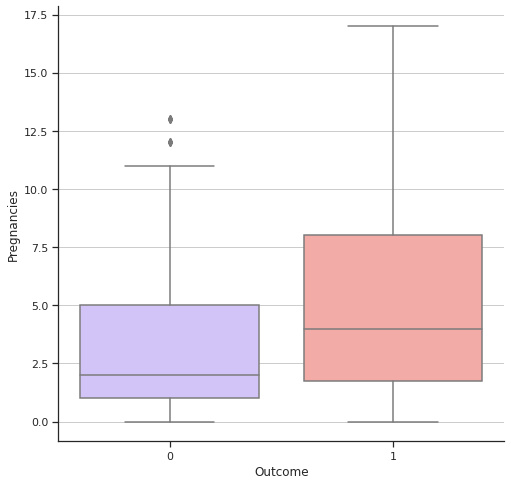

In [15]:
#visualizing each attribute, grouping by Outcome, to compare distributions of each attribute and see how the means
    #differ depending on whether someone has diagnosed diabetes or not:

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="Outcome", y="Pregnancies", palette=["m", "r"], data=data)
sns.despine(offset=0)

#this boxplot allows us to see the distributions of pregnancies, based on Outcome
#this is beneficial for when I perform the ANOVAs, since I can now split the 'number of pregnancies' into groups 
    #based on this distribution

In [16]:
#I can see that the medians of both groups are around 2 and 4
#the groups I will divide the Pregnancies into are [0-1], [2-3], [4-6], [7+]
#I will come back and revise these groups later, if needed
#now I need to add another column to the dataframe that includes the "Group #" for the Pregnancies value
    #basically I am "binning" right now:

#function to make subgroups of each attribute:

def new_column(data, row_number, value1, value2, value3):
    new_list = [None]*len(data)
    i=0
    for index, r in data.iterrows():
        if r[row_number] < (float(value1)+0.1):
            new_list[i] = ('0-'+str(value1))
            i+=1
        elif r[row_number] >= (float(value1)+0.1) and r[row_number] < (float(value2)+0.1):
            new_list[i] = (str(value1)+'-'+str(value2))
            i+=1
        elif r[row_number] >= (float(value2)+0.1) and r[row_number] < (float(value3)+0.1):
            new_list[i] = (str(value2)+'-'+str(value3))
            i+=1
        elif r[row_number] >= (float(value3)+0.1):
            new_list[i] = (str(value3)+'+')
            i+=1
    return(new_list)

#Pregnancies, this attribute is odd due to integers instead of floats

data['PregnancyGroupings'] = new_column(data, 0, 1.9, 3.9, 6.9)
print(data['PregnancyGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

0-1.9      246
1.9-3.9    178
3.9-6.9    175
6.9+       169
Name: PregnancyGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings  
0                     0.627   50        1            3.9-6.9  
1                     0.351   31        0              0-1.9  
2                     0.672   32        1               6.9+  
3                     0.167   21        0              0-1.9  
4                     2.288   33        1              0-1.9

0-98       175
115-140    203
140+       194
98-115     196
Name: GlucoseGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  
0                     0.627   50        1            3.9-6.9             140+  
1                     0.351   31        0              0-1.9             0-98  
2                     0.672   32        1               6.9+             140+  
3                     0.167   21        0              0-1.9             0-98  
4                     2.288   33        1              0-1.9          115-140

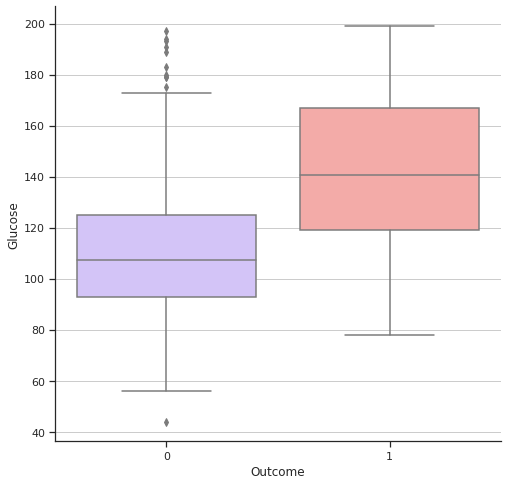

In [17]:
#now repeat for each of the other columns: (summarized in single cells for the sake of space/time)
#procedure for each attribute is to first visualize with a boxplot, then visually divide the range into 4 subgroups 
    #based on where the average (between the two Outcomes) quartiles and whiskers are placed, then to input these 
    #numbers into the new_column function, evaluating the number of observations in each bin and changing the bin 
    #boundaries through trial and error until the bins are approximately equal in size:

#Glucose

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="Outcome", y="Glucose", palette=["m", "r"], data=data)
sns.despine(offset=0)

data['GlucoseGroupings'] = new_column(data, 1, 98, 115, 140)
print(data['GlucoseGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

0-65     208
65-72    195
72-80    200
80+      165
Name: BPGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings  
0       65-72  
1       65-72  
2        0-65  
3       65-72  
4        0-65

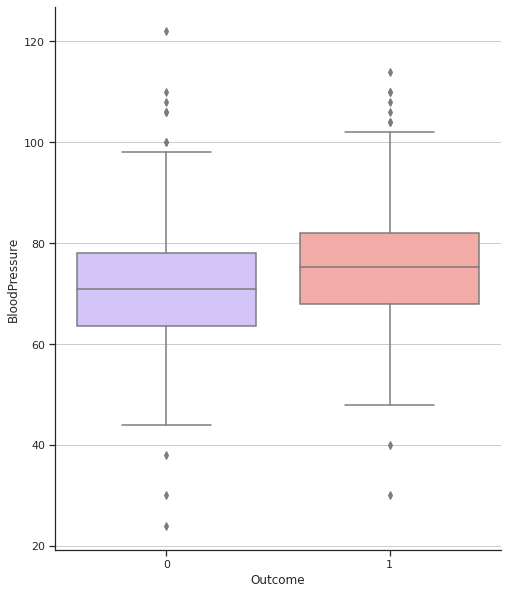

In [18]:
#BloodPressure

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,10))
plt.grid()
sns.boxplot(x="Outcome", y="BloodPressure", palette=["m", "r"], data=data)
sns.despine(offset=0)

data['BPGroupings'] = new_column(data, 2, 65, 72, 80)
print(data['BPGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

0-20     124
20-25     76
25-35    423
35+      145
Name: STGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings STGroupings  
0       65-72       25-35  
1       65-72       25-35  
2        0-65       25-35  
3       65-72       20-25  
4        0-65       25-35

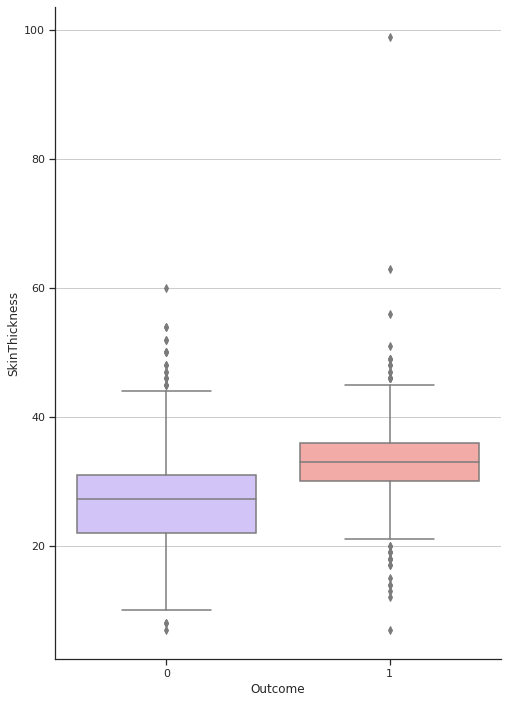

In [19]:
#SkinThickness

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,12))
plt.grid()
sns.boxplot(x="Outcome", y="SkinThickness", palette=["m", "r"], data=data)
sns.despine(offset=0)

data['STGroupings'] = new_column(data, 3, 20, 25, 35)
print(data['STGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

0-0.1     374
0.1-80    105
150+      153
80-150    136
Name: InsulinGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings STGroupings InsulinGroupings  
0       65-72       25-35            0-0.1  
1       65-72       25-35            0-0.1  
2        0-65       25-35            0-0.1  
3       65-72       20-25           80-150  
4        0-65       25-35             150+

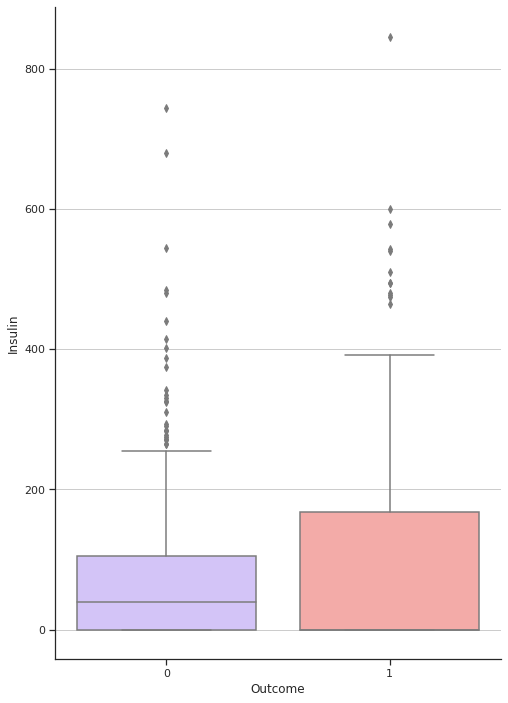

In [20]:
#Insulin     
            
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,12))
plt.grid()
sns.boxplot(x="Outcome", y="Insulin", palette=["m", "r"], data=data)
sns.despine(offset=0)

data['InsulinGroupings'] = new_column(data, 4, 0.1, 80, 150)
print(data['InsulinGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head() #0-0.1 group is basically a group of people with 0 insulin

0-20      14
20-25     98
25-30    180
30+      476
Name: BMIGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings STGroupings InsulinGroupings BMIGroupings  
0       65-72       25-35            0-0.1          30+  
1       65-72       25-35            0-0.1        25-30  
2        0-65       25-35            0-0.1        20-25  
3       65-72       20-25           80-150        25-30  
4        0-65       25-35             150+          30+

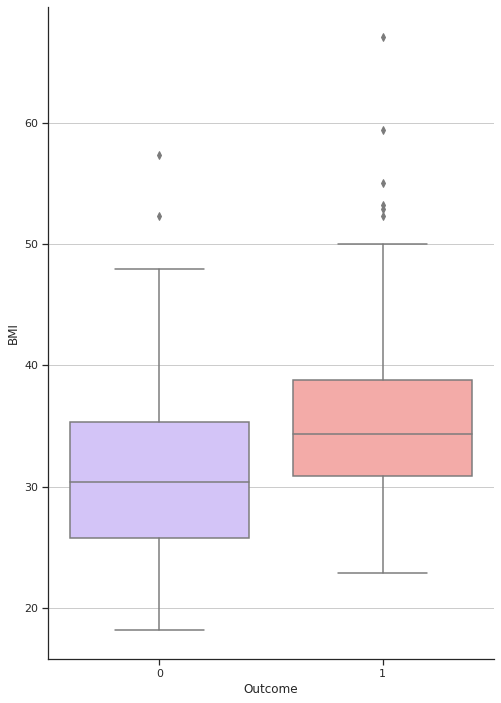

In [21]:
#BMI

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,12))
plt.grid()
sns.boxplot(x="Outcome", y="BMI", palette=["m", "r"], data=data)
sns.despine(offset=0)
   
data['BMIGroupings'] = new_column(data, 5, 20, 25, 30) #grouped according to US standards
print(data['BMIGroupings'].value_counts().sort_index()) #see how many entries are in each group
data.head()
#source: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/english_bmi_calculator/bmi_calculator.html

0-0.15      205
0.15-0.3    203
0.3-0.55    181
0.55+       179
Name: DFPGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings STGroupings InsulinGroupings BMIGroupings DFPGroupings  
0       65-72       25-35            0-0.1          30+     0.3-0.55  
1       65-72       25-35            0-0.1        25-30     0.15-0.3  
2        0-65       25-35            0-0.1        20-25        0.55+  
3       65-72       20-25           80-150        25-30       0-0.15  
4        0-65       25-35             150+          30+        0.55+

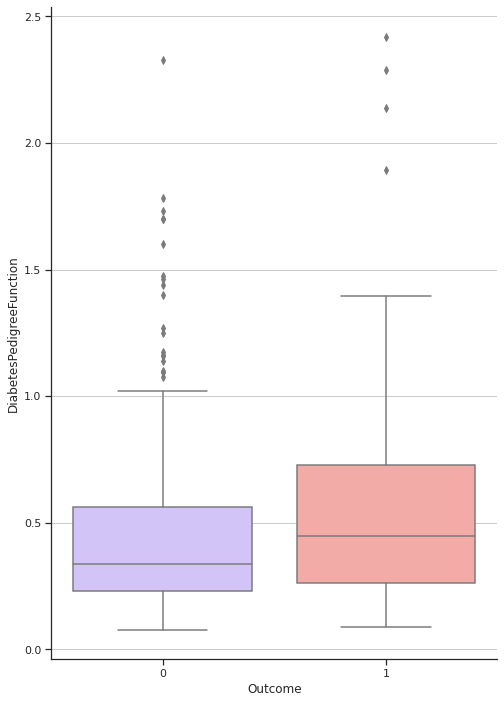

In [22]:
#DiabetesPedigreeFunction

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,12))
plt.grid()
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", palette=["m", "r"], data=data)
sns.despine(offset=0)
   
data['DFPGroupings'] = new_column(data, 6, .15, .3, .55)
print(data['DFPGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

0-25     267
25-30    150
30-40    157
40+      194
Name: AgeGroupings, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           33.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome PregnancyGroupings GlucoseGroupings  \
0                     0.627   50        1            3.9-6.9             140+   
1                     0.351   31        0              0-1.9             0-98   
2                     0.672   32        1               6.9+             140+   
3                     0.167   21        0              0-1.9             0-98   
4                     2.288   33        1              0-1.9          115-140   

  BPGroupings STGroupings InsulinGroupings BMIGroupings DFPGroupings  \
0       65-72       25-35            0-0.1          30+     0.3-0.55   
1       65-72       25-35            0-0.1        25-30     0.15-0.3   
2        0-65       25-35            0-0.1        20-25        0.55+   
3       65-72       20-25           80-150        25-30       0-0.15   
4        0-65       25-35             150+          30+        0.55+   

  AgeGroupings  
0          40+  
1        30-40  
2        30-40  
3         0-25  
4        30-40

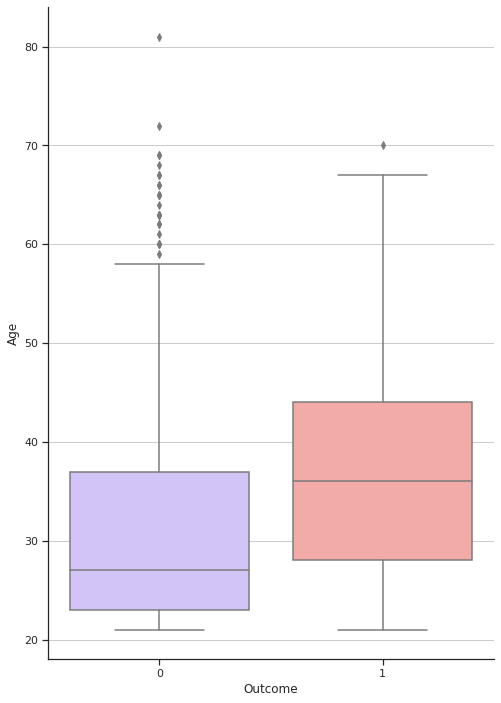

In [23]:
#Age

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,12))
plt.grid()
sns.boxplot(x="Outcome", y="Age", palette=["m", "r"], data=data)
sns.despine(offset=0)
   
data['AgeGroupings'] = new_column(data, 7, 25, 30, 40)
print(data['AgeGroupings'].value_counts().sort_index()) #see how many entries are in each group, approx. equal
data.head()

In [24]:
#now testing two assumptions of GLMs:
#1. Assumption of normality for each attribute
#2. Test of homogeneity of variance for each attribute

#1. with alpha = 0.05

def shapiro_function(column_name):
    return stats.shapiro(data[column_name])

for name in headers:
    print(name + "  :  " + str(shapiro_function(name)))

#very small pvalue suggests 'Pregnancies' is not a normally distributed value, this makes sense since
    #it should be a very right skewed statistic (cannnot have negative number of pregnancies)
#I reject the null hypothesis for all attributes, rejecting that the data is from a normal distribution
    #as expected, I do not have perfectly normally distributed data, but c'est la vie, moving on..

Pregnancies  :  ShapiroResult(statistic=0.9042782783508301, pvalue=1.6080885881590613e-21)
Glucose  :  ShapiroResult(statistic=0.9699075818061829, pvalue=1.782425942953303e-11)
BloodPressure  :  ShapiroResult(statistic=0.9886093139648438, pvalue=1.1095724403276108e-05)
SkinThickness  :  ShapiroResult(statistic=0.9526727199554443, pvalue=5.367789241252693e-15)
Insulin  :  ShapiroResult(statistic=0.7220207452774048, pvalue=7.915248149269491e-34)
BMI  :  ShapiroResult(statistic=0.9794151186943054, pvalue=6.3127774119209334e-09)
DiabetesPedigreeFunction  :  ShapiroResult(statistic=0.8365186452865601, pvalue=2.477696547502535e-27)
Age  :  ShapiroResult(statistic=0.8747662305831909, pvalue=2.401946561183188e-24)


In [25]:
#2. Pregnancies: (alpha = 0.05)

!pip install bioinfokit
from bioinfokit.analys import stat

def variance_test(data, res_var, xfac_var):
    res=stat()
    res.levene(df=data, res_var = res_var, xfac_var = xfac_var)
    return(res.levene_summary)

for name in headers:
    print(name + "  :  " + str(variance_test(data, name, "Outcome")))

#a pvalue of 0.0000 suggests I do reject H0 (variances are the same)
#shows that variances are statistically different from each other (not ideal)

#there is a mix of data with statistically different means based on Outcome, and those for which this is not true
    #not ideal in real practice
    #attributes that potentially have consistent variance are BloodPressure, BMI, Age

Pregnancies  :                   Parameter    Value
0      Test statistics (W)  22.7472
1  Degrees of freedom (Df)   1.0000
2                  p value   0.0000
Glucose  :                   Parameter    Value
0      Test statistics (W)  22.9758
1  Degrees of freedom (Df)   1.0000
2                  p value   0.0000
BloodPressure  :                   Parameter   Value
0      Test statistics (W)  0.2383
1  Degrees of freedom (Df)  1.0000
2                  p value  0.6256
SkinThickness  :                   Parameter   Value
0      Test statistics (W)  3.3065
1  Degrees of freedom (Df)  1.0000
2                  p value  0.0694
Insulin  :                   Parameter    Value
0      Test statistics (W)  17.8162
1  Degrees of freedom (Df)   1.0000
2                  p value   0.0000
BMI  :                   Parameter   Value
0      Test statistics (W)  1.2155
1  Degrees of freedom (Df)  1.0000
2                  p value  0.2706
DiabetesPedigreeFunction  :                   Parameter    Value

In [26]:
#t-tests:

def t_test_function(column_name):
    return ttest_ind(*data.groupby('Outcome')[column_name].apply(lambda a:list(a))) #assumes equal variance of samples

for name in headers:
    print(name + "  :  " + str(t_test_function(name)))
        
#I can see that all H0's (means for the attribute are identical for each group of Outcomes) are rejected for the 
    #attributes I have

Pregnancies  :  Ttest_indResult(statistic=-6.298430550035151, pvalue=5.065127298053476e-10)
Glucose  :  Ttest_indResult(statistic=-15.807451449039215, pvalue=6.342123143758429e-49)
BloodPressure  :  Ttest_indResult(statistic=-4.921868510389964, pvalue=1.050055667491212e-06)
SkinThickness  :  Ttest_indResult(statistic=-8.963039398250602, pvalue=2.379422973455058e-18)
Insulin  :  Ttest_indResult(statistic=-3.64432538765356, pvalue=0.00028618646036031987)
BMI  :  Ttest_indResult(statistic=-9.194582155497818, pvalue=3.487255859728982e-19)
DiabetesPedigreeFunction  :  Ttest_indResult(statistic=-4.88582646072744, pvalue=1.254607010148809e-06)
Age  :  Ttest_indResult(statistic=-6.792688071649956, pvalue=2.2099754606654358e-11)


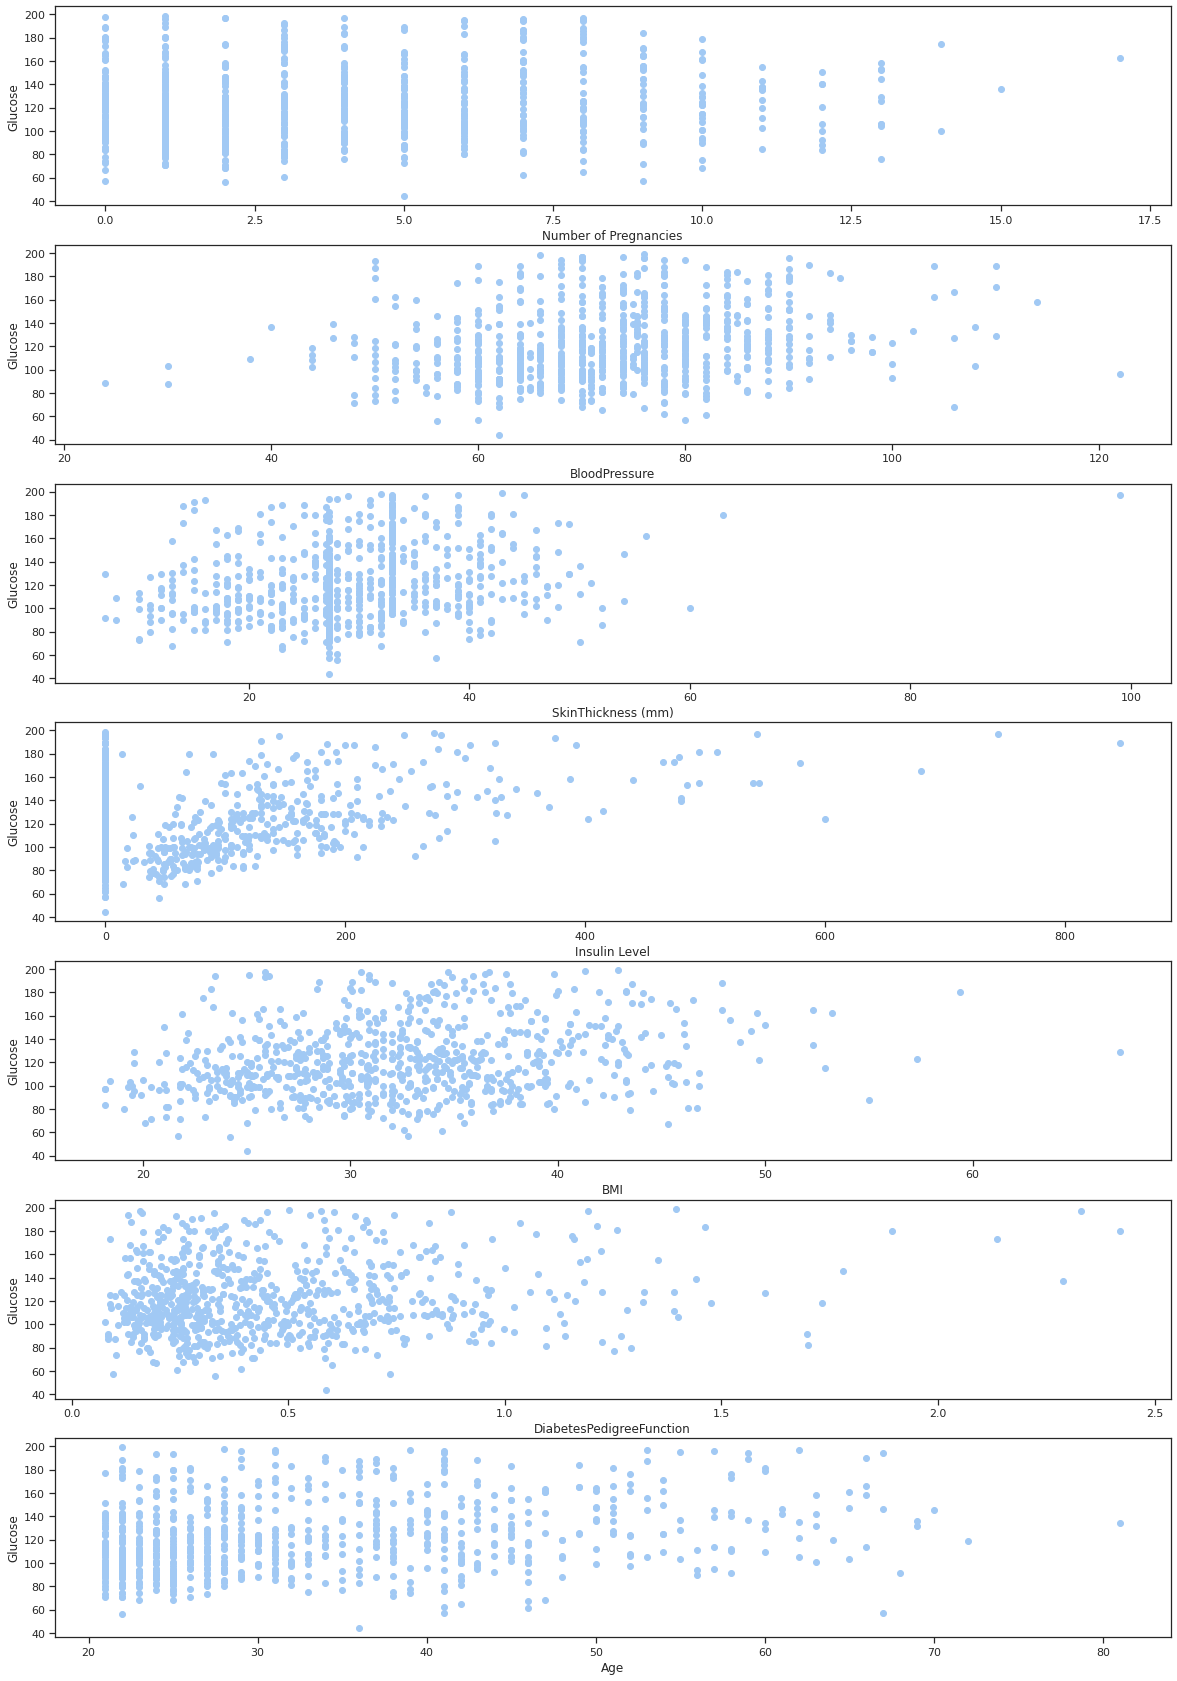

In [27]:
#I can see from the t-test results that the Glucose column has the most distinct means between Outcomes, based
    #on p-value

#my aim is to make a MLR model to predict Glucose based on various combinations of the other columns
    #one assumption of MLR is a linear relationship between dependent and independent variables, which I test
    #by constructing multiple scatter plots for the numerical variables (attribtues)
    
fig, ax = plt.subplots(7, 1, figsize=(20, 30))
ax[0].scatter(x = data['Pregnancies'], y = data['Glucose'])
ax[0].set_xlabel("Number of Pregnancies") #categorical variable disguised as numerical, no distinct correlation
ax[0].set_ylabel("Glucose")

ax[1].scatter(x = data['BloodPressure'], y = data['Glucose'])
ax[1].set_xlabel("BloodPressure") #no linear correlation seemingly present
ax[1].set_ylabel("Glucose")

ax[2].scatter(x = data['SkinThickness'], y = data['Glucose'])
ax[2].set_xlabel("SkinThickness (mm)") #no linear correlation seemingly present
ax[2].set_ylabel("Glucose")

ax[3].scatter(x = data['Insulin'], y = data['Glucose'])
ax[3].set_xlabel("Insulin Level") #vague linear correlation may be present, too many 0s to analyze accurately
ax[3].set_ylabel("Glucose")

ax[4].scatter(x = data['BMI'], y = data['Glucose'])
ax[4].set_xlabel("BMI") #no linear correlation seemingly present
ax[4].set_ylabel("Glucose")

ax[5].scatter(x = data['DiabetesPedigreeFunction'], y = data['Glucose'])
ax[5].set_xlabel("DiabetesPedigreeFunction") #no linear correlation seemingly present
ax[5].set_ylabel("Glucose")

ax[6].scatter(x = data['Age'], y = data['Glucose'])
ax[6].set_xlabel("Age") #categorical variable disguised as numerical, no distinct correlation
ax[6].set_ylabel("Glucose")

plt.show() #looks very nice

In [38]:
#single linear regression for each attribute on Glucose to assess linearity:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for i in headers:
    x = data[i].array.reshape(-1,1)
    y = data['Glucose'].array.reshape(-1,1)
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    print('Coefficient of Determination for '+ i +" =", r_sq)
    
#can see that R^2 values are pretty low, consistent with scatterplot above (Glucose is obviously 1.0)

Coefficient of Determination for Pregnancies = 0.01686535777438891
Coefficient of Determination for Glucose = 1.0
Coefficient of Determination for BloodPressure = 0.05033545476983137
Coefficient of Determination for SkinThickness = 0.05524362633073954
Coefficient of Determination for Insulin = 0.10920459104172298
Coefficient of Determination for BMI = 0.05534391076599565
Coefficient of Determination for DiabetesPedigreeFunction = 0.0190785693312
Coefficient of Determination for Age = 0.07212765035734592


In [39]:
#moving on to Multiple Linear Regression:

#the t-tests above showed me that Glucose, Age, Pregnancies and BMI are the four attributes with strongest differences
    #in mean between those with diabetes, and those without
    
#what I want to answer from the MLR is do Age, Pregnancies and BMI predict Glucose better than all the attributes
    #in a model together (basically, do the other attributes take away from the predictive power of the first 3)?

#I will be making two MLR models, one with 3 numerical predictors + Outcome class, and one with 7 numerical predictors
    #+ Outcome class:
    
X = data[['Pregnancies', 'BMI', 'Age', 'Outcome']]
y = data['Glucose']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=None) #test is 20% of full dataset

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

Actual   Predicted
618   112.0  145.862384
195   158.0  142.962472
683   125.0  139.144344
225    87.0  108.565522
592   132.0  149.136653
..      ...         ...
707   127.0  107.919405
728   175.0  102.451432
740   120.0  150.471283
389   100.0  109.016859
635   104.0  139.125112

[154 rows x 2 columns]

In [40]:
from sklearn import metrics
import numpy as np

print('MAE for the 3 numerical predictors is:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE for the 3 numerical predictors is:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for the 3 numerical predictors is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE for the 3 numerical predictors is: 21.52228290839319
MSE for the 3 numerical predictors is: 714.2427173717191
RMSE for the 3 numerical predictors is: 26.725319780532452


In [41]:
#now comparing to a full model, using all columns of the dataset:

X = data[['Pregnancies', 'BMI', 'Age', 'Outcome', 'BloodPressure', 'SkinThickness', 'Insulin', 
          'DiabetesPedigreeFunction']]
y = data['Glucose']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=None) #test is 20% of full dataset

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

dffull = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dffull

Actual   Predicted
44    159.0  104.600287
68     95.0  103.351841
707   127.0  120.598563
20    126.0  128.240793
240    91.0   99.485003
..      ...         ...
481   123.0  112.165117
589    73.0  103.338633
151   114.0  104.788837
465   124.0  104.599828
361   158.0  118.602499

[154 rows x 2 columns]

In [42]:
print('MAE for the full columns model is:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE for the full columns model is:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE for the full columns model is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE for the full columns model is: 19.445304248561197
MSE for the full columns model is: 578.4983487540659
RMSE for the full columns model is: 24.051992615042643


In [ ]:
#I can see that including the columns with less powerful t-test results still yields a stronger predictive model
    #than just a few attributes for the Glucose column values
    
#moving on to one-way ANOVA...

In [27]:
#using the categorical groups I created for each attribute, now doing one-way ANOVAs with certain pairs of attributes
    #to examine the strength of their relationship (metric being p-value)

#Glucose by far seemed to have the largest difference in means, dependent on Diabetes class, so this is the 
    #attribute I will focus most on
    
#there are seemingly an infinite number of analyses that could be done with this dataset, this will be my focus
#this is where I will start, by doing one-way ANOVAs between these 4 attributes:

!pip install pingouin
import pingouin as pg

def one_way_ANOVA(dv, between):
    print(pg.anova(data=data, dv = dv, between = between, detailed = True))

Processing /home/jovyan/.cache/pip/wheels/8e/f4/3f/2629f2a31641ee865256bd1a03e0f3c66cea7ba4fa30ca7f9e/pingouin-0.5.1-py3-none-any.whl
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
Processing /home/jovyan/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a/littleutils-0.2.2-py3-none-any.whl
  Using cached xarray-2022.3.0-py3-none-any.whl (870 kB)


             Source           SS   DF         MS         F     p-unc       np2
0  GlucoseGroupings   170.710040    3  56.903347  5.091932  0.001705  0.019603
1            Within  8537.851158  764  11.175198       NaN       NaN       NaN


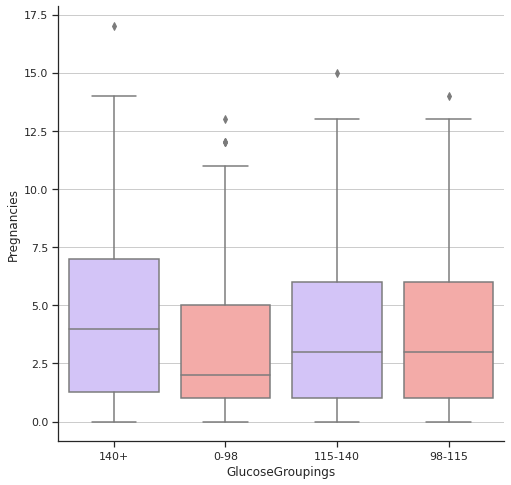

In [28]:
#user-defined function has been defined, now visualizing number of Pregnancies by Glucose categorical groups:

#1. GlucoseGroupings, Pregnancies

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="GlucoseGroupings", y="Pregnancies", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Pregnancies', 'GlucoseGroupings') #p < 0.05 shows means are statistically different depending on
                                                 #categorical level of Glucose

#is this relationship statistically similar the other way around?:

               Source             SS   DF           MS         F     p-unc  \
0  PregnancyGroupings   19768.328308    3  6589.442769  7.275502  0.000082   
1              Within  691956.982406  764   905.702857       NaN       NaN   

        np2  
0  0.027775  
1       NaN  


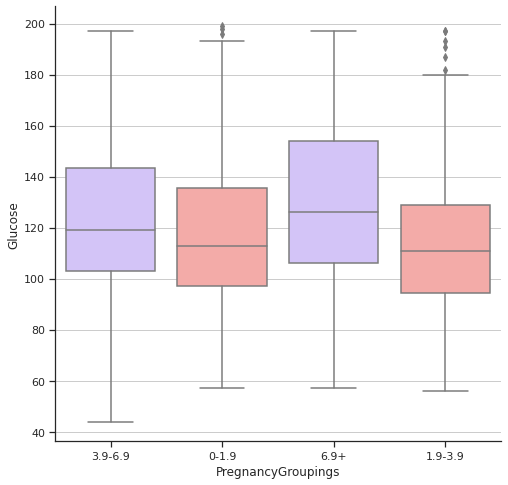

In [29]:
#2. PregnancyGroupings, Glucose

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="PregnancyGroupings", y="Glucose", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Glucose', 'PregnancyGroupings') #p < 0.05 shows means are statistically different depending on
                                               #categorical level of Pregnancies

#a smaller p-value here shows that there is potentially stronger predictive power for Glucose based on previous
    #number of Pregnancies, instead of vice-versa

             Source            SS   DF          MS          F         p-unc  \
0  GlucoseGroupings   2197.124273    3  732.374758  16.409841  2.419413e-10   
1            Within  34097.485553  764   44.630217        NaN           NaN   

        np2  
0  0.060536  
1       NaN  


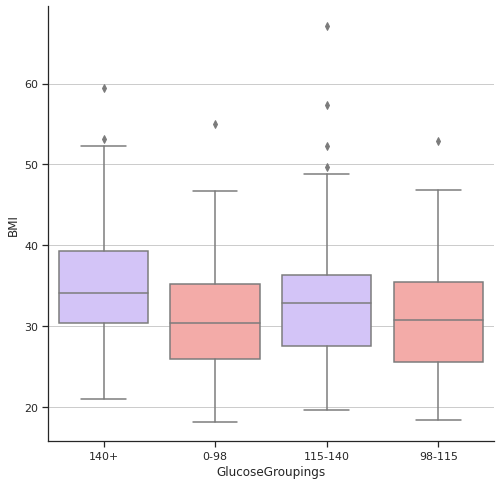

In [30]:
#for the sake of time I will assume that with greater age comes greater number of pregnancies (positive correlation 
    #between age and number of pregnancies) and skip this ANOVA
    #however it would be run the same way, if I were interested in answering that particular research question

#not all of these combinations will be interesting, such as the relationship between Age and BMI, which may have
    #nothing to do with Diabetes status (this will be explored in the two-way ANOVA instead)
    
#3. GlucoseGroupings, BMI

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="GlucoseGroupings", y="BMI", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('BMI', 'GlucoseGroupings') #p < 0.05 shows means are statistically different depending on
                                         #categorical level of Glucose

#is this relationship statistically similar the other way around?:

         Source             SS   DF            MS          F         p-unc  \
0  BMIGroupings   36177.914004    3  12059.304668  13.638286  1.128203e-08   
1        Within  675547.396709  764    884.224341        NaN           NaN   

        np2  
0  0.050831  
1       NaN  


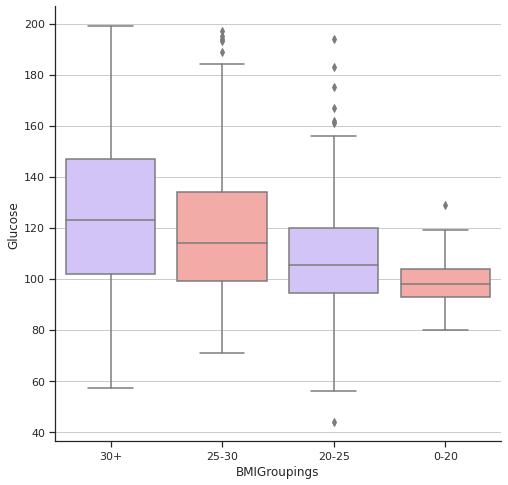

In [31]:
#4. BMIGroupings, Glucose

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="BMIGroupings", y="Glucose", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Glucose', 'BMIGroupings') #p < 0.05 shows means are statistically different depending on
                                         #categorical level of BMI

#a (barely) larger p-value here shows that there is potentially less strong predictive power for Glucose based on 
    #BMI, instead of vice-versa

             Source            SS   DF           MS          F         p-unc  \
0  GlucoseGroupings   8088.465838    3  2696.155279  21.021158  4.301014e-13   
1            Within  97989.970360  764   128.259124        NaN           NaN   

       np2  
0  0.07625  
1      NaN  


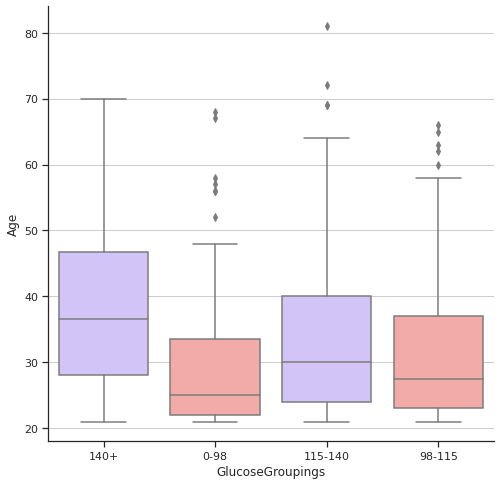

In [32]:
#5. GlucoseGroupings, Age

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="GlucoseGroupings", y="Age", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Age', 'GlucoseGroupings') #p < 0.05 shows means are statistically different depending on
                                         #categorical level of Glucose (strongest p-value so far)

#is this relationship statistically similar the other way around?:

         Source             SS   DF            MS          F         p-unc  \
0  AgeGroupings   49925.244245    3  16641.748082  19.211687  5.111468e-12   
1        Within  661800.066469  764    866.230453        NaN           NaN   

        np2  
0  0.070147  
1       NaN  


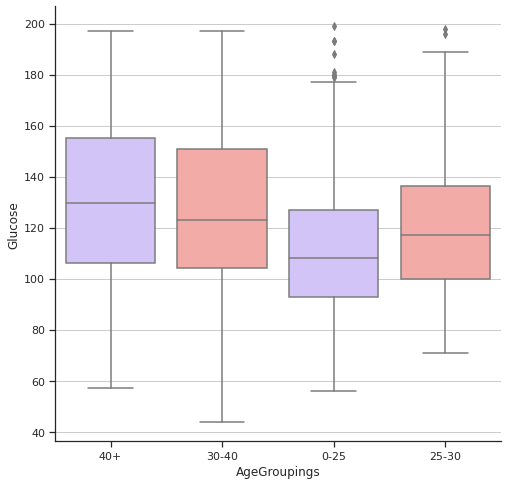

In [33]:
#6. AgeGroupings, Glucose

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="AgeGroupings", y="Glucose", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Glucose', 'AgeGroupings') #p < 0.05 shows means are statistically different depending on
                                         #categorical level of Age

#a (barely) larger p-value here shows that there is potentially less strong predictive power for Glucose based on 
    #Age, instead of vice-versa

         Source             SS   DF          MS         F     p-unc       np2
0  BMIGroupings     413.585178    3  137.861726  0.996797  0.393711  0.003899
1        Within  105664.851020  764  138.304779       NaN       NaN       NaN


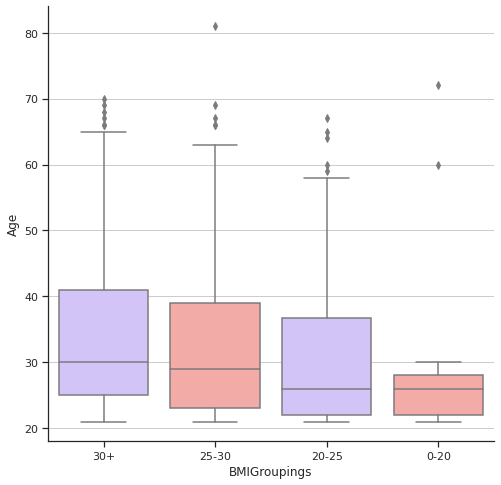

In [34]:
#7. BMIGroupings, Age

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="BMIGroupings", y="Age", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('Age', 'BMIGroupings') #p > 0.05 shows means are NOT statistically different depending on
                                     #categorical level of BMI

#is this relationship statistically different the other way around?:

         Source            SS   DF          MS         F     p-unc       np2
0  AgeGroupings    697.774466    3  232.591489  4.992014  0.001958  0.019225
1        Within  35596.835359  764   46.592716       NaN       NaN       NaN


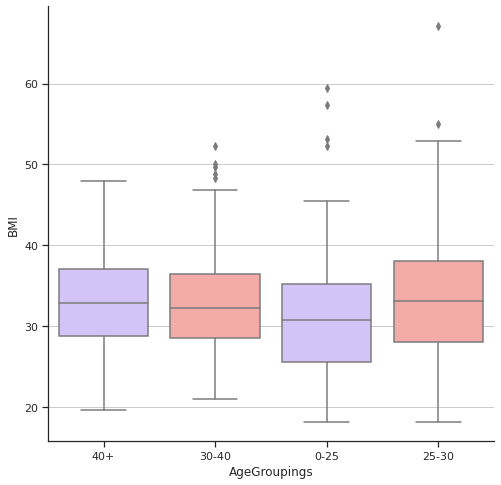

In [35]:
#8. AgeGroupings, BMI

sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,8))
plt.grid()
sns.boxplot(x="AgeGroupings", y="BMI", palette=["m", "r"], data=data)
sns.despine(offset=0)

#now conducting one-way ANOVA (after visualizing, they print in reverse order) to determine if the means are 
    #statistically different:

one_way_ANOVA('BMI', 'AgeGroupings') #p < 0.05 shows means are statistically different depending on
                                         #categorical level of Age

#a smaller and significant p-value here shows that there is greater predictive power for BMI based on Age, than
    #vice-versa

In [36]:
#post-hoc tests for one-way ANOVAs:

def tukey_post_hoc(dv, between):
    print(pg.pairwise_tukey(dv=dv, between=between, data = data, effsize = 'cohen')) #using cohen metric

tukey_post_hoc('Pregnancies', 'GlucoseGroupings')#most significant differences between [0-98 and 140+] and 
    #[98-115 and 140+] - evaluated by holistically comparing p-values and cohen effect sizes
tukey_post_hoc('Glucose', 'PregnancyGroupings')#most significant differences between [2-4 and 7+] and [0-2 and 7+]

         A        B   mean(A)   mean(B)      diff        se         T  \
0     0-98  115-140  3.211429  3.847291 -0.635862  0.344831 -1.843981   
1     0-98     140+  3.211429  4.551546 -1.340118  0.348515 -3.845228   
2     0-98   98-115  3.211429  3.709184 -0.497755  0.347670 -1.431687   
3  115-140     140+  3.847291  4.551546 -0.704256  0.335640 -2.098246   
4  115-140   98-115  3.847291  3.709184  0.138107  0.334763  0.412551   
5     140+   98-115  4.551546  3.709184  0.842363  0.338556  2.488102   

    p-tukey     cohen  
0  0.253563 -0.190211  
1  0.000751 -0.400881  
2  0.479886 -0.148898  
3  0.154560 -0.210670  
4  0.976312  0.041313  
5  0.062561  0.251983  
         A        B     mean(A)     mean(B)       diff        se         T  \
0    0-1.9  1.9-3.9  118.723299  116.185393   2.537906  2.961408  0.856993   
1    0-1.9  3.9-6.9  118.723299  123.472223  -4.748924  2.976099 -1.595688   
2    0-1.9     6.9+  118.723299  129.994083 -11.270784  3.006810 -3.748419   
3  1.9-3

In [37]:
#next pair of attributes:

tukey_post_hoc('BMI', 'GlucoseGroupings')#most significant differences between [0-98 and 98-115] and [98-115 and 140+]
tukey_post_hoc('Glucose', 'BMIGroupings')#most significant differences between [20-25 and 30+] and [0-20 and 30+]

         A        B    mean(A)    mean(B)      diff        se         T  \
0     0-98  115-140  30.697364  32.876976 -2.179612  0.689118 -3.162903   
1     0-98     140+  30.697364  34.979381 -4.282017  0.696479 -6.148096   
2     0-98   98-115  30.697364  31.055030 -0.357666  0.694791 -0.514781   
3  115-140     140+  32.876976  34.979381 -2.102406  0.670750 -3.134409   
4  115-140   98-115  32.876976  31.055030  1.821946  0.668998  2.723395   
5     140+   98-115  34.979381  31.055030  3.924352  0.676578  5.800294   

        p-tukey     cohen  
0  8.802615e-03 -0.326261  
1  7.571392e-09 -0.640964  
2  9.555632e-01 -0.053538  
3  9.656212e-03 -0.314704  
4  3.337848e-02  0.272723  
5  5.805246e-08  0.587426  
       A      B     mean(A)     mean(B)       diff        se         T  \
0   0-20  20-25   99.642857  108.802488  -9.159631  8.495974 -1.078114   
1   0-20  25-30   99.642857  117.970244 -18.327387  8.250530 -2.221359   
2   0-20    30+   99.642857  126.410258 -26.767401  8.06

In [38]:
#next pair:

tukey_post_hoc('Age', 'GlucoseGroupings')#most significant differences between [0-98 and 140+] and [98-115 and 140+]
tukey_post_hoc('Glucose', 'AgeGroupings')#most significant differences between [0-25 and 40+] and [0-25 and 30-40]

         A        B    mean(A)    mean(B)      diff        se         T  \
0     0-98  115-140  29.348571  33.758621 -4.410049  1.168216 -3.775030   
1     0-98     140+  29.348571  38.144330 -8.795758  1.180694 -7.449650   
2     0-98   98-115  29.348571  31.326531 -1.977959  1.177834 -1.679319   
3  115-140     140+  33.758621  38.144330 -4.385709  1.137079 -3.856997   
4  115-140   98-115  33.758621  31.326531  2.432090  1.134108  2.144495   
5     140+   98-115  38.144330  31.326531  6.817799  1.146958  5.944245   

        p-tukey     cohen  
0  9.887096e-04 -0.389403  
1  1.719291e-12 -0.776657  
2  3.353290e-01 -0.174652  
3  7.173435e-04 -0.387254  
4  1.401042e-01  0.214751  
5  2.529809e-08  0.602005  
       A      B     mean(A)     mean(B)       diff        se         T  \
0   0-25  25-30  111.962291  120.326667  -8.364376  3.003195 -2.785159   
1   0-25  30-40  111.962291  127.084838 -15.122547  2.960017 -5.108939   
2   0-25    40+  111.962291  131.795462 -19.833171  2.77

In [39]:
#last pair:

tukey_post_hoc('Age', 'BMIGroupings')#most significant difference between [20-25 and 30+], none were really significant
tukey_post_hoc('BMI', 'AgeGroupings')#most significant differences between [0-25 and 25-30] and [0-25 and 40+]

       A      B    mean(A)    mean(B)      diff        se         T   p-tukey  \
0   0-20  20-25  30.642857  31.816327 -1.173469  3.360087 -0.349238  0.985370   
1   0-20  25-30  30.642857  32.966667 -2.323810  3.263016 -0.712166  0.892285   
2   0-20    30+  30.642857  33.714286 -3.071429  3.188960 -0.963144  0.770440   
3  20-25  25-30  31.816327  32.966667 -1.150340  1.476358 -0.779174  0.863905   
4  20-25    30+  31.816327  33.714286 -1.897959  1.304542 -1.454886  0.465517   
5  25-30    30+  32.966667  33.714286 -0.747619  1.029037 -0.726523  0.886487   

      cohen  
0 -0.099782  
1 -0.197598  
2 -0.261169  
3 -0.097816  
4 -0.161387  
5 -0.063571  
       A      B    mean(A)    mean(B)      diff        se         T   p-tukey  \
0   0-25  25-30  31.167857  33.478443 -2.310586  0.696507 -3.317389  0.005253   
1   0-25  30-40  31.167857  32.886624 -1.718768  0.686494 -2.503691  0.060124   
2   0-25    40+  31.167857  33.051889 -1.884032  0.643951 -2.925737  0.018535   
3  25-30  

In [40]:
#some major takeaways
#1. BMI and Age were not as statistically distinct in their predictive power as other pairs of attributes
#2. Glucose and Age were most predictive of each other
#3. Glucose groupings of [0-98 and 140+] and [98-115 and 140+] were always seen as most distinct from each other
    #when using these groupings to predict other attributes
#4. Age grouping 0-25 was quite distinct from other means, as was 7+ Pregnancies

df       sum_sq     mean_sq          F  \
C(GlucoseGroupings)               3.0    17.142072    5.714024   0.529345   
C(Outcome)                        1.0   275.231051  275.231051  25.497281   
C(GlucoseGroupings):C(Outcome)    3.0    58.780823   19.593608   1.815143   
Residual                        760.0  8203.839284   10.794525        NaN   

                                      PR(>F)  
C(GlucoseGroupings)             6.622456e-01  
C(Outcome)                      5.550295e-07  
C(GlucoseGroupings):C(Outcome)  1.429118e-01  
Residual                                 NaN

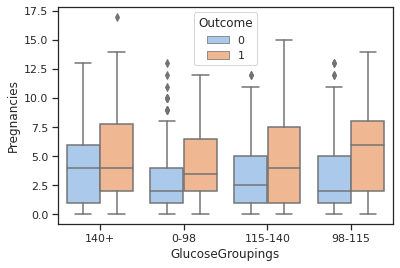

In [41]:
#now the Outcome class will be incorporated into the ANOVA to construct a series of two-way ANOVAs between the 
    #columns previously examined, looking for differing results in order to answer the reseach questions 
    #(see writeup)

#1. Glucose and Outcome to predict Pregnancies:

sns.boxplot(x="GlucoseGroupings", y='Pregnancies', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Pregnancies', 
               anova_model='Pregnancies~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
res.anova_summary #p-values show that Outcome is predictive of Pregnancies, GlucoseGroupings/interaction term is not

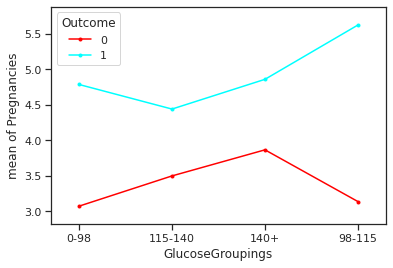

In [42]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['GlucoseGroupings'], trace=data['Outcome'], response=data['Pregnancies'])
plt.show() #shows that diabetics and non-diabetics have visually distinct trends for number of Pregnancies
#one point to note is that mid-level Glucose (98-115) seems to be very indicative of number of Pregnancies
    #based on diabetic status (far right of image)

In [43]:
res = stat()
res.tukey_hsd(df=data, res_var='Pregnancies', xfac_var = 'Outcome',
              anova_model='Pregnancies~C(Outcome) + C(GlucoseGroupings) + C(Outcome):C(GlucoseGroupings)')
print(res.tukey_summary) #statistical difference in mean number Pregnancies according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='Pregnancies', xfac_var = 'GlucoseGroupings',
              anova_model='Pregnancies~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for only the [0-98 and 140+] Glucose groupings
    #this matches the trend/result I saw in the one-way ANOVA

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


   group1  group2      Diff    Lower     Upper   q-value  p-value
0       1       0  1.567672  1.07939  2.055953  8.913333    0.001
    group1   group2      Diff     Lower     Upper   q-value   p-value
0     140+     0-98  1.340118  0.458193  2.222043  5.533029  0.001000
1     140+  115-140  0.704256 -0.145090  1.553602  3.019237  0.142965
2     140+   98-115  0.842363 -0.014363  1.699088  3.580214  0.055998
3     0-98  115-140  0.635862 -0.236742  1.508466  2.653367  0.239159
4     0-98   98-115  0.497755 -0.382033  1.377543  2.060104  0.465535
5  115-140   98-115  0.138107 -0.709020  0.985234  0.593634  0.900000


df         sum_sq        mean_sq  \
C(PregnancyGroupings)               3.0    2468.546422     822.848807   
C(Outcome)                          1.0  157763.726700  157763.726700   
C(PregnancyGroupings):C(Outcome)    3.0    3572.167411    1190.722470   
Residual                          760.0  530621.088295     698.185642   

                                           F        PR(>F)  
C(PregnancyGroupings)               1.178553  3.169204e-01  
C(Outcome)                        225.962433  6.631800e-45  
C(PregnancyGroupings):C(Outcome)    1.705453  1.644391e-01  
Residual                                 NaN           NaN

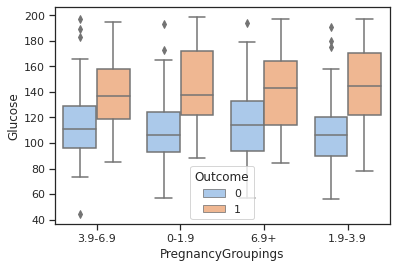

In [45]:
#2. Pregnancies and Outcome to predict Glucose:

sns.boxplot(x="PregnancyGroupings", y='Glucose', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Glucose', 
               anova_model='Glucose~C(PregnancyGroupings) + C(Outcome) + C(PregnancyGroupings):C(Outcome)')
res.anova_summary #p-values show that Outcome is predictive of Glucose, PregnancyGroupings/interaction term is not

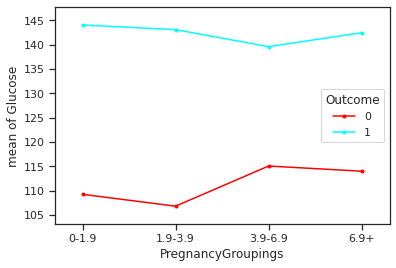

In [46]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['PregnancyGroupings'], trace=data['Outcome'], response=data['Glucose'])
plt.show() #shows that diabetics and non-diabetics have visually distinct trends for Glucose levels

In [50]:
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'Outcome',
              anova_model='Glucose~C(Outcome) + C(PregnancyGroupings) + C(Outcome):C(PregnancyGroupings)')
print(res.tukey_summary) #statistical difference in mean Glucose number according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'PregnancyGroupings',
              anova_model='Glucose~C(PregnancyGroupings) + C(Outcome) + C(PregnancyGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for a couple PregnancyGroupings
    #this matches the trend/result I saw in the one-way ANOVA

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


   group1  group2       Diff      Lower      Upper    q-value  p-value
0       1       0  31.675686  27.748749  35.602623  22.393777    0.001
    group1   group2       Diff     Lower      Upper   q-value   p-value
0  3.9-6.9    0-1.9   4.748924 -1.978928  11.476776  2.570220  0.265972
1  3.9-6.9     6.9+   6.521859 -0.815483  13.859202  3.236563  0.101559
2  3.9-6.9  1.9-3.9   7.286830  0.044467  14.529193  3.663615  0.047962
3    0-1.9     6.9+  11.270784  4.473504  18.068063  6.037686  0.001000
4    0-1.9  1.9-3.9   2.537906 -4.156736   9.232548  1.380383  0.737444
5     6.9+  1.9-3.9  13.808690  6.501786  21.115593  6.881302  0.001000


df        sum_sq      mean_sq          F  \
C(GlucoseGroupings)               3.0    488.881021   162.960340   3.857582   
C(Outcome)                        1.0   1899.297207  1899.297207  44.959992   
C(GlucoseGroupings):C(Outcome)    3.0     92.624991    30.874997   0.730870   
Residual                        760.0  32105.563355    42.244162        NaN   

                                      PR(>F)  
C(GlucoseGroupings)             9.337712e-03  
C(Outcome)                      3.923243e-11  
C(GlucoseGroupings):C(Outcome)  5.337444e-01  
Residual                                 NaN

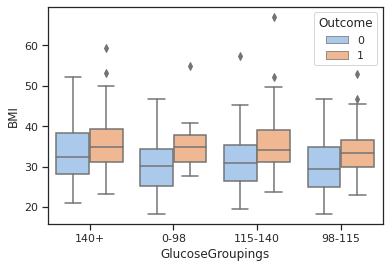

In [48]:
#3. Glucose and Outcome to predict BMI:

sns.boxplot(x="GlucoseGroupings", y='BMI', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='BMI', 
               anova_model='BMI~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
res.anova_summary #p-values show that Outcome and GlucoseGroupings are predictive of BMI, interaction term is not
#so by adding the Outcome in a two-way ANOVA, that interaction term is not predictive, but GlucoseGroupings is

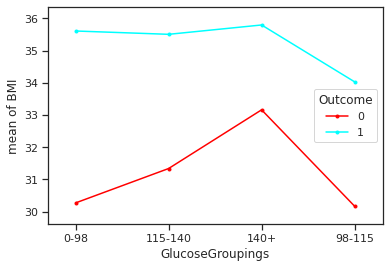

In [49]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['GlucoseGroupings'], trace=data['Outcome'], response=data['BMI'])
plt.show() #shows that diabetics and non-diabetics have visually similar trends for BMI over the Glucose range
           #but these levels of BMI are visually distinct. The closest being BMI for those in [98-115] Glucose and
           #diabetic and those [140+] Glucose and non-diabetic.
           #generally, diabetics have higher BMIs, with a dip for those in the [98-115] Glucose range

In [51]:
res = stat()
res.tukey_hsd(df=data, res_var='BMI', xfac_var = 'Outcome',
              anova_model='BMI~C(Outcome) + C(GlucoseGroupings) + C(Outcome):C(GlucoseGroupings)')
print(res.tukey_summary) #statistical difference in mean BMI number according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='BMI', xfac_var = 'GlucoseGroupings',
              anova_model='BMI~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for all but 1 GlucoseGroupings
    #this matches the trend/result I saw in the one-way ANOVA

   group1  group2      Diff     Lower     Upper    q-value  p-value
0       1       0  4.547093  3.581149  5.513037  13.068846    0.001
    group1   group2      Diff     Lower     Upper   q-value   p-value
0     140+     0-98  4.282017  2.537348  6.026687  8.936898  0.001000
1     140+  115-140  2.102406  0.422185  3.782626  4.556189  0.007256
2     140+   98-115  3.924352  2.229533  5.619171  8.431332  0.001000
3     0-98  115-140  2.179612  0.453382  3.905842  4.597608  0.006580
4     0-98   98-115  0.357666 -1.382777  2.098108  0.748288  0.900000
5  115-140   98-115  1.821946  0.146115  3.497778  3.958739  0.026916


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


df        sum_sq       mean_sq             F  \
C(BMIGroupings)               3.0  3.617791e+04  1.205930e+04  1.752394e+01   
C(Outcome)                    1.0 -6.619407e-10 -6.619407e-10 -9.618972e-13   
C(BMIGroupings):C(Outcome)    3.0  1.518565e+05  5.061882e+04  7.355659e+01   
Residual                    761.0  5.236909e+05  6.881616e+02           NaN   

                                  PR(>F)  
C(BMIGroupings)             5.217664e-11  
C(Outcome)                  1.000000e+00  
C(BMIGroupings):C(Outcome)  8.808842e-42  
Residual                             NaN

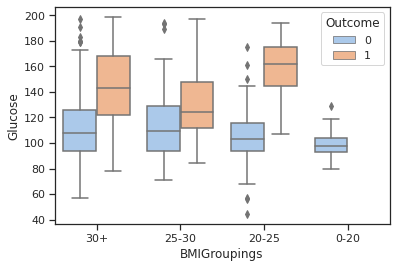

In [52]:
#4. BMI and Outcome to predict Glucose:

sns.boxplot(x="BMIGroupings", y='Glucose', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Glucose', 
               anova_model='Glucose~C(BMIGroupings) + C(Outcome) + C(BMIGroupings):C(Outcome)')
res.anova_summary #p-values show that BMIGroupings and interaction term are predictive of Glucose, Outcome is not
#here the interaction term is VERY STRONG, as well as the BMIGroupings to predict Glucose

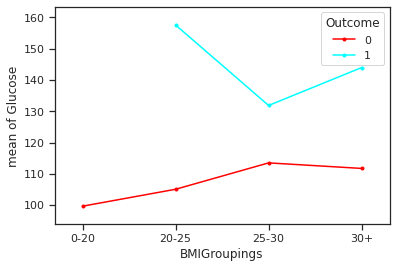

In [53]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['BMIGroupings'], trace=data['Outcome'], response=data['Glucose'])
plt.show() #TO NOTE: there are no diabetics with a BMI lower than 20!
           #this is important since it signifies that having a BMI < 20 could be indicative of being non-diabetic
                #although this is a small sample size to make such a strong conclusion
           #there is no cross over in this plot, Glucose levels are much more volatile for diabetics, particularly
           #high for those in the 'normal' BMI range

In [54]:
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'Outcome',
              anova_model='Glucose~C(Outcome) + C(BMIGroupings) + C(Outcome):C(BMIGroupings)')
print(res.tukey_summary) #statistical difference in mean Glucose number according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'BMIGroupings',
              anova_model= 'Glucose~C(BMIGroupings) + C(Outcome) + C(BMIGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for all but 2 BMIGroupings combinations
    #this matches the trend/result I saw in the one-way ANOVA

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


   group1  group2       Diff      Lower      Upper    q-value  p-value
0       1       0  31.675686  27.777049  35.574322  22.556287    0.001
  group1 group2       Diff      Lower      Upper   q-value   p-value
0    30+  25-30   8.440015   2.529945  14.350085  5.199970  0.001440
1    30+  20-25  17.607770  10.115389  25.100151  8.557260  0.001000
2    30+   0-20  26.767401   8.452230  45.082573  5.321640  0.001037
3  25-30  20-25   9.167755   0.688581  17.646929  3.936948  0.028134
4  25-30   0-20  18.327387  -0.413108  37.067881  3.560982  0.058008
5  20-25   0-20   9.159631 -10.138373  28.457636  1.728287  0.599452


df        sum_sq      mean_sq          F  \
C(GlucoseGroupings)               3.0   3683.977146  1227.992382   9.746602   
C(Outcome)                        1.0   1622.206461  1622.206461  12.875487   
C(GlucoseGroupings):C(Outcome)    3.0    613.955979   204.651993   1.624327   
Residual                        760.0  95753.807920   125.991853        NaN   

                                  PR(>F)  
C(GlucoseGroupings)             0.000003  
C(Outcome)                      0.000354  
C(GlucoseGroupings):C(Outcome)  0.182293  
Residual                             NaN

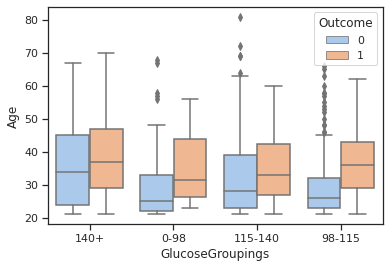

In [56]:
#5. Glucose and Outcome to predict Age:

sns.boxplot(x="GlucoseGroupings", y='Age', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Age', 
               anova_model='Age~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
res.anova_summary #p-values show that GlucoseGroupings and Outcome are separately predictive of Age, not interaction
#each column/variable is predictive, but not the interaction term, gain nothing by adding this term

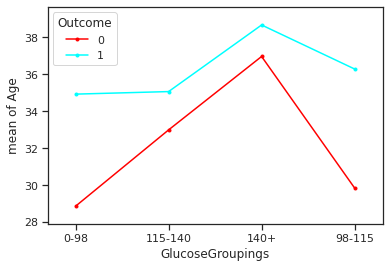

In [57]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['GlucoseGroupings'], trace=data['Outcome'], response=data['Age'])
plt.show() #these trends are closer than any other interaction plots, there is cross over between the lines and
           #mean Age for those in the [115-140] and [140+] groups are similar across diabetics and non-diabetics
           #I would not have guessed this interaction plot trend based on one-way ANOVA results
           #accounting for Outcome has a substantial effect here

In [58]:
res = stat()
res.tukey_hsd(df=data, res_var='Age', xfac_var = 'Outcome',
              anova_model='Age~C(Outcome) + C(GlucoseGroupings) + C(Outcome):C(GlucoseGroupings)')
print(res.tukey_summary) #statistical difference in mean Age according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='Age', xfac_var = 'GlucoseGroupings',
              anova_model= 'Age~C(GlucoseGroupings) + C(Outcome) + C(GlucoseGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for all but 2 GlucoseGroupings
    #this matches the trend/result I see in the interaction plot

   group1  group2      Diff     Lower     Upper   q-value  p-value
0       1       0  5.877164  4.208996  7.545332  9.781003    0.001
    group1   group2      Diff     Lower      Upper    q-value   p-value
0     140+     0-98  8.795758  5.782745  11.808772  10.629768  0.001000
1     140+  115-140  4.385709  1.483998   7.287420   5.503478  0.001000
2     140+   98-115  6.817799  3.890877   9.744721   8.481733  0.001000
3     0-98  115-140  4.410049  1.428880   7.391218   5.386521  0.001000
4     0-98   98-115  1.977959 -1.027755   4.983673   2.396190  0.327398
5  115-140   98-115  2.432090 -0.462041   5.326221   3.059941  0.134278


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


df         sum_sq        mean_sq           F  \
C(AgeGroupings)               3.0    9311.800495    3103.933498    4.497895   
C(Outcome)                    1.0  134450.064835  134450.064835  194.830929   
C(AgeGroupings):C(Outcome)    3.0    2884.764750     961.588250    1.393433   
Residual                    760.0  524465.236884     690.085838         NaN   

                                  PR(>F)  
C(AgeGroupings)             3.875524e-03  
C(Outcome)                  1.384945e-39  
C(AgeGroupings):C(Outcome)  2.435223e-01  
Residual                             NaN

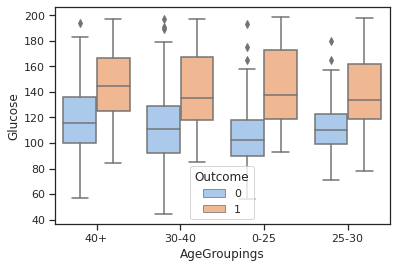

In [59]:
#6. Age and Outcome to predict Glucose:

sns.boxplot(x="AgeGroupings", y='Glucose', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Glucose', 
               anova_model='Glucose~C(AgeGroupings) + C(Outcome) + C(AgeGroupings):C(Outcome)')
res.anova_summary #p-values show that AgeGroupings and Outcome are separately predictive of Glucose, not interaction
#each column/variable is predictive, but not the interaction term, gain nothing by adding this term

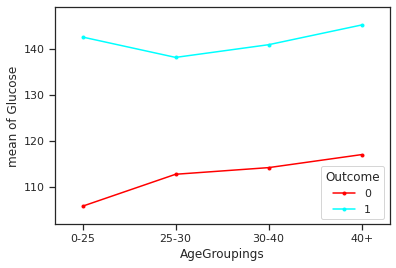

In [60]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['AgeGroupings'], trace=data['Outcome'], response=data['Glucose'])
plt.show() #these trends are significantly different, Diabetes class seems a good predictor of Glucose
           #this confirms the trend I saw in the t-test AND one-way ANOVA
           #Glucose is most strongly predicted by Diabetes class

In [61]:
res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'Outcome',
              anova_model= 'Glucose~C(Outcome) + C(AgeGroupings) + C(Outcome):C(AgeGroupings)')
print(res.tukey_summary) #statistical difference in mean Glucose according to Outcome (good, this confirms)

res = stat()
res.tukey_hsd(df=data, res_var='Glucose', xfac_var = 'AgeGroupings',
              anova_model= 'Glucose~C(AgeGroupings) + C(Outcome) + C(AgeGroupings):C(Outcome)')
print(res.tukey_summary) #statistical differences for all but 2 AgeGroupings

   group1  group2       Diff      Lower      Upper    q-value  p-value
0       1       0  31.675686  27.771594  35.579778  22.524816    0.001
  group1 group2       Diff      Lower      Upper    q-value   p-value
0    40+  30-40   4.710624  -2.550284  11.971532   2.362321  0.340402
1    40+   0-25  19.833171  13.452270  26.214072  11.317790  0.001000
2    40+  25-30  11.468795   4.114843  18.822747   5.678694  0.001000
3  30-40   0-25  15.122547   8.320094  21.925000   8.094889  0.001000
4  30-40  25-30   6.758171  -0.964398  14.480740   3.186537  0.110236
5   0-25  25-30   8.364376   1.462696  15.266056   4.412962  0.010106


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


df        sum_sq       mean_sq             F  \
C(BMIGroupings)               3.0  4.135852e+02  1.378617e+02  1.053353e+00   
C(Outcome)                    1.0 -4.904038e-12 -4.904038e-12 -3.747003e-14   
C(BMIGroupings):C(Outcome)    3.0  6.065974e+03  2.021991e+03  1.544932e+01   
Residual                    761.0  9.959888e+04  1.308789e+02           NaN   

                                  PR(>F)  
C(BMIGroupings)             3.682533e-01  
C(Outcome)                  1.000000e+00  
C(BMIGroupings):C(Outcome)  9.159029e-10  
Residual                             NaN

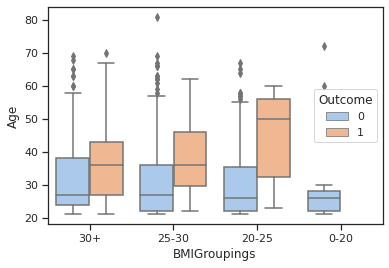

In [62]:
#7. BMI and Outcome to predict Age:
#this will be interesting since this was the ONLY non-significant one-way ANOVA

sns.boxplot(x="BMIGroupings", y='Age', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='Age', 
               anova_model='Age~C(BMIGroupings) + C(Outcome) + C(BMIGroupings):C(Outcome)')
res.anova_summary #p-values show that only the interaction term is predictive of Age, not BMIGroupings OR Outcome
                  #I haven't seen this result yet, good to note

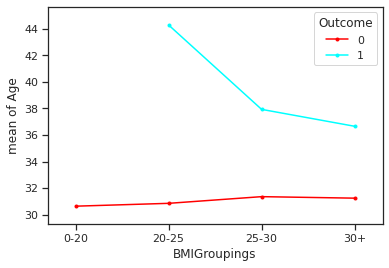

In [63]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['BMIGroupings'], trace=data['Outcome'], response=data['Age'])
plt.show() #these trends are VERY similar to Glucose prediction based on BMI
           #key to note that there are no diabetics below 20 BMI, as I saw previously in an interaction plot

In [64]:
res = stat()
res.tukey_hsd(df=data, res_var='Age', xfac_var = 'Outcome',
              anova_model= 'Age~C(Outcome) + C(BMIGroupings) + C(Outcome):C(BMIGroupings)')
print(res.tukey_summary) #statistical difference in mean Age according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='Age', xfac_var = 'BMIGroupings',
              anova_model= 'Age~C(BMIGroupings) + C(Outcome) + C(BMIGroupings):C(Outcome)')
print(res.tukey_summary) #NO statistical differences for ANY BMIGroupings
                         #interesting to note, AND confirms response from one-way ANOVA

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


   group1  group2      Diff     Lower     Upper   q-value  p-value
0       1       0  5.877164  4.176955  7.577374  9.596651    0.001
  group1 group2      Diff     Lower      Upper   q-value   p-value
0    30+  25-30  0.747619 -1.829784   3.325022  1.056205  0.866027
1    30+  20-25  1.897959 -1.369495   5.165414  2.115084  0.442096
2    30+   0-20  3.071429 -4.915884  11.058741  1.400200  0.729585
3  25-30  20-25  1.150340 -2.547458   4.848139  1.132748  0.835668
4  25-30   0-20  2.323810 -5.848988  10.496607  1.035333  0.874304
5  20-25   0-20  1.173469 -7.242460   9.589399  0.507715  0.900000


df        sum_sq      mean_sq          F  \
C(AgeGroupings)               3.0    304.615025   101.538342   2.411409   
C(Outcome)                    1.0   3214.381017  3214.381017  76.337529   
C(AgeGroupings):C(Outcome)    3.0    380.769128   126.923043   3.014264   
Residual                    760.0  32001.685214    42.107481        NaN   

                                  PR(>F)  
C(AgeGroupings)             6.565046e-02  
C(Outcome)                  1.513124e-17  
C(AgeGroupings):C(Outcome)  2.935316e-02  
Residual                             NaN

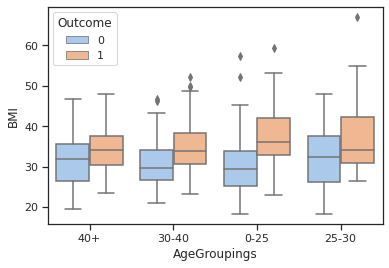

In [65]:
#8. Age and Outcome to predict BMI:

sns.boxplot(x="AgeGroupings", y='BMI', hue = 'Outcome', data=data) #add layer for two-way (colour)

res = stat()
res.anova_stat(df=data, res_var='BMI', 
               anova_model='BMI~C(AgeGroupings) + C(Outcome) + C(AgeGroupings):C(Outcome)')
res.anova_summary #p-values show that Outcome and the interaction term are predictive of BMI, not AgeGroupings
                  #goes hand-in-hand with result from previous two-way ANOVA

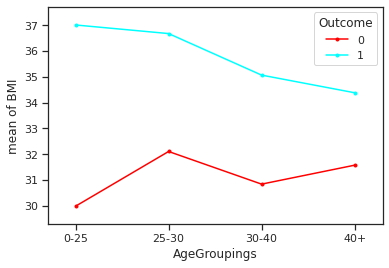

In [66]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=data['AgeGroupings'], trace=data['Outcome'], response=data['BMI'])
plt.show() #these trends are distinct for Diabetes class, no cross over, distinct trends for each class

In [67]:
res = stat()
res.tukey_hsd(df=data, res_var='BMI', xfac_var = 'Outcome',
              anova_model= 'BMI~C(Outcome) + C(AgeGroupings) + C(Outcome):C(AgeGroupings)')
print(res.tukey_summary) #statistical difference in mean BMI according to Outcome

res = stat()
res.tukey_hsd(df=data, res_var='BMI', xfac_var = 'BMIGroupings',
              anova_model= 'BMI~C(AgeGroupings) + C(Outcome) + C(AgeGroupings):C(Outcome)')
print(res.tukey_summary) #p-values suggest distinct means between all AgeGroupings except [0-20] and [0-25]
                         #comparing this to the blue line above for these groups, this makes sense visually

   group1  group2      Diff     Lower     Upper   q-value  p-value
0       1       0  4.547093  3.582713  5.511473  13.09004    0.001
  group1 group2       Diff      Lower      Upper    q-value   p-value
0    30+  25-30   8.855055   7.393119  10.316991  22.055375  0.001000
1    30+  20-25  13.301937  11.448595  15.155279  26.134297  0.001000
2    30+   0-20  17.357039  12.826533  21.887545  13.950201  0.001000
3  25-30  20-25   4.446882   2.349444   6.544321   7.720010  0.001000
4  25-30   0-20   8.501984   3.866269  13.137699   6.678133  0.001000
5  20-25   0-20   4.055102  -0.718521   8.828725   3.093180  0.127509


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


In [ ]:
#completed all ANOVAs
#Time to start the write-up!